# Introduction to Geometries

This notebook is a modified version of M. Janosov's original, as presented in *[Geospatial Data Science Essentials](https://www.janosov.com/books/geo/)*


Geometries are the cornerstone of spatial data, acting as the geographical framework that links various pieces of information to specific locations on the Earth's surface. They provide the spatial structure necessary to conduct a wide array of analyses in geospatial data science. Therefore, understanding the theory and mastering the implementation of geometries is crucial for effectively working with any geospatial data.

In this notebook, we will
1. study the basic types of geometries, such as points, lines, and polygons. These geometries can represent a diverse range of geographical entities, from the locations of bars and restaurants to street segments, riverbeds, country borders, and crop fields.
2.  review essential operations for transforming and combining these geometries.

Learning these concepts will enable us to perform advanced spatial analyses and create insightful visualizations.

To achieve this, we will utilize the powerful [Shapely](https://shapely.readthedocs.io/en/stable/) library, specifically designed for creating, manipulating, and analyzing geometric objects.


### 1. Creating a Point


A **point** is the simplest type of geometric object, representing a single location in a two-dimensional space. It is defined by a pair of coordinates (x, y) and is often used to represent discrete places such as cities, landmarks, or any specific location of interest. In geospatial data science, points are fundamental for mapping and spatial analysis. Often, such a  point location is called a **point of interest (POI)**.

Shapely provides a straightforward way to create point geometries using the `Point` constructor. We create a point placed at (1, 1), print the point object, and then visualize it by outputting the point.

The type of the point:  <class 'shapely.geometry.point.Point'> 

The point itself:  POINT (1 1) 



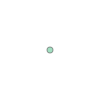

In [1]:
# Import the Point constructor
from shapely.geometry import Point

# Create a point with coordinates (1, 1)
point = Point(1, 1)

# Print the point
print("The type of the point: ", type(point), "\n")

# Print the point
print("The point itself: ", point, "\n")

# Show the point on the cell's output
point

As this cell shows, we indeed created a point, which is visualized by a small circle in the Jupyter environment.

&nbsp;

### 2. Creating Line Segments 

A **line segment** is a geometric object that represents a series of connected points in a two-dimensional space. It is defined by a sequence of coordinate pairs (x, y), consisting of multiple straight line segments.

In Shapely, lines are stored in the `LineString` data structure and are usually used to represent one-dimensional spatial objects such as roads, rivers, and sidewalks. In geospatial data science, LineStrings are essential for modeling and analyzing linear spatial features. 

Shapely provides a straightforward way to create and manipulate LineString geometries using the LineString constructor, which we will see in the following cell where we create a line segment connecting the points:

> (0, 0), (1, 1), and (3, 4).

After creating the object, we print it and visualize it on the cell output.

The type of the line:  <class 'shapely.geometry.linestring.LineString'> 

The line itself:  LINESTRING (0 0, 2 1, 3 4) 

LINESTRING (0 0, 2 1, 3 4) 



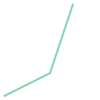

In [2]:
# Import the LineString constructor
from shapely.geometry import LineString

# Create a line from two points (0, 0), (1, 1), and (3, 4)
line = LineString([(0, 0), (2, 1), (3, 4)])

# Print the line

print("The type of the line: ", type(line), "\n")

# Print the point
print("The line itself: ", line, "\n")

# Print the line
print(line, "\n")

# Show the line on the cell's output
line

Here, we created a LineString, which consists of two straight segments, as shown on the cell output.

### 3. Creating Polygons and Multipolygons


A **polygon** is a two-dimensional geometric object that represents a closed shape defined by a series of connected points, where the first and last points are identical to close the shape. Polygons are used to represent areas such as countries, lakes, or any other bounded region. In geospatial data science, polygons are fundamental for mapping and analyzing spatial areas. Later, we will use Shapely's `Polygon` constructor to create polygon objects.

One step further, we will meet a **multipolygon**, which is a geometric object that represents a collection of multiple polygons treated as a single entity. This is useful for representing spatial features consisting of several disconnected areas, such as multiple land parcels. Shapely provides a straightforward way to create and manipulate multipolygon geometries using the `MultiPolygon` constructor.

Similar to the generalization from polygon to multipolygon, Shapely also has`MultiPoint` and `MultiLineString` classes, which  are collections of multiple points and LineStrings, respectively, treated as single entities. Finally, `GeometryCollections` are the most general collections that can contain a mix of different geometries, such as points, LineStrings, and polygons, all within a single object. These collections are useful for complex spatial analyses involving multiple types of geometries. 

- First, we create a polygon called `polygon_1` -  a triangle with the vertices placed at the (0, 0), (1, 1), and (1, 0).
- Second, we create another triangle (`polygon_2`) with its corners placed at the points (1, 0), (1, 1), and (1.5, 0).
- Third, we create a MultiPolygon by joining these two triangles.

After each geometry creation step, we also print the geometries and visualize them at the cell's outputs.

The type of the first polygon:  <class 'shapely.geometry.polygon.Polygon'> 

The first polygon itself:  POLYGON ((0 0, 1 1, 1 0, 0 0)) 

POLYGON ((0 0, 1 1, 1 0, 0 0)) 



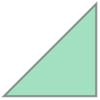

In [3]:
# Import the Polygon constructor from Shapely
from shapely.geometry import Polygon, MultiPolygon

# Create the first polygon with a series of points
polygon_1 = Polygon([(0, 0), (1, 1), (1, 0)])

# Print the first polygon
print("The type of the first polygon: ", type(polygon_1), "\n")

# Print the point
print("The first polygon itself: ", polygon_1, "\n")

# Print and show the first polygon
print(polygon_1, "\n")
polygon_1

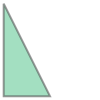

In [4]:
# Create the second polygon with another series of points
polygon_2 = Polygon([(1, 0), (1, 1), (1.5, 0)])
polygon_2

The type of the multipolygon:  <class 'shapely.geometry.multipolygon.MultiPolygon'> 

The first multipolygon itself:  MULTIPOLYGON (((0 0, 1 1, 1 0, 0 0)), ((1 0, 1 1, 1.5 0, 1 0))) 

MULTIPOLYGON (((0 0, 1 1, 1 0, 0 0)), ((1 0, 1 1, 1.5 0, 1 0))) 



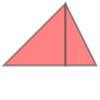

In [5]:
# Import the MultiPolygon constructor from Shapely
from shapely.geometry import MultiPolygon

# Combine the two polygons into a multipolygon
multipolygon = MultiPolygon([polygon_1, polygon_2])

# Print the multipolygon
print("The type of the multipolygon: ", type(multipolygon), "\n")

# Print the point
print("The first multipolygon itself: ", multipolygon, "\n")

# Print and show the multipolygon
print(multipolygon, "\n")

multipolygon

### 4. Buffering a Geometry

**Buffering** means transforming an existing geometry into a new geometry that represents all points within a specified distance from the original geometry. This operation is useful for creating zones around spatial features, such as protective zones around natural resources, areas of influence around infrastructure, or any region that needs to be considered within a certain distance from a given place. Hence, we can buffer points, lines, and polygons as well. All buffering operations result in a polygon.

Shapely provides a straightforward way to buffer geometries using the `buffer` method, which can be applied to any geometric object. 

The following example shows how we can buffer a point at (0, 0) with a buffer radius of 1 unit, which will result in a circle. Then, we output the circle using the usual methods.

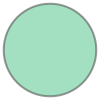

In [6]:
# Import the Point constructor from Shapely
from shapely.geometry import Point

# Create a point at coordinates (0, 0)
point = Point(0, 0)

# Buffer the point by a specified distance (e.g. 1 unit) to create a circle
circle = point.buffer(1)

# Show the buffered geometry (circle)
circle

Now, we repeat the same buffering steps on a triangle, resulting in a buffered polygon, a triangle with rounded vertices.

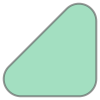

In [7]:
# Import the Polygon constructor from Shapely
from shapely.geometry import Polygon

# Create a polygon from a series of points 
# (the first and last points must be the same to close the shape)
polygon = Polygon([(0, 0), (1, 1), (1, 0)])

# Buffer the polygon by a distance of 0.3 units
buffered_polygon = polygon.buffer(0.3)

# Show the buffered geometry
buffered_polygon

### 5. Set Operations on Geometries

Set operations on geometries allow us to quantify spatial relationships and perform operations between different geometric shapes. These operations are fundamental in spatial analysis and are widely used in countless domains of spatial analytics. 

Shapely provides a range of set operations that can be performed on geometries, including intersection, union, difference, and symmetric difference. Now we review the most frequently used ones.

#### Intersection

The `intersection` operation finds the common area shared by two geometries. This is useful for determining overlapping regions between spatial features - geometric objects representing real-world entities in a spatial  context. To test the intersection method, in the following two cells, we create a triangle and a circle using the previously introduced steps. Then, we create their intersection and output the resulting polygon.

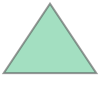

In [8]:
# Import the Polygon constructor from Shapely
from shapely.geometry import Polygon

# Create the first polygon
polygon1 = Polygon([(0, 0), (2, 0), (1, 1.5)])
polygon1

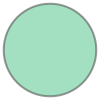

In [9]:
# Create the second polygon
polygon2 = Point(0,1).buffer(1)
polygon2

Intersection: POLYGON ((0.9230119102873612 1.3845178654310417, 0.9238795325112865 1.3826834323650905, 0.9569403357322088 1.2902846772544625, 0.9807852804032303 1.1950903220161286, 0.9951847266721969 1.0980171403295604, 1 1, 0.9951847266721969 0.9019828596704393, 0.9807852804032304 0.8049096779838718, 0.9569403357322088 0.7097153227455377, 0.9238795325112867 0.6173165676349102, 0.881921264348355 0.5286032631740023, 0.8314696123025452 0.4444297669803978, 0.773010453362737 0.3656067158363545, 0.7071067811865476 0.2928932188134525, 0.6343932841636455 0.226989546637263, 0.5555702330196023 0.1685303876974548, 0.4713967368259978 0.1180787356516451, 0.3826834323650898 0.0761204674887133, 0.2902846772544623 0.0430596642677912, 0.1950903220161283 0.0192147195967696, 0.0980171403295608 0.0048152733278032, 0 0, 0.9230119102873612 1.3845178654310417)) 



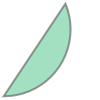

In [10]:
# Compute the intersection of the two polygons
intersection = polygon1.intersection(polygon2)

# Print and show the intersected geometry
print(f"Intersection: {intersection}", "\n")

intersection

#### Union

The `union` operation combines two geometries into a single geometry that covers all areas of the input geometries. This is useful for merging adjacent areas or combining multiple features into a single entity. As this example shows, we can, for instance, easily join the previously created triangle and circle to turn them into one merged polygon containing all areas covered by either of these geometries.

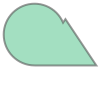

In [11]:
# Compute the union of the two polygons
union = polygon1.union(polygon2)

# Show the union geometry
union

#### Difference

The `difference` operation subtracts the area of one geometry from another, resulting in a geometry that represents the part of the first geometry that does not overlap with the second geometry. This is useful for finding the area of a feature that lies outside another feature. Similarly to the union command, we can test the difference method by subtracting the second polygon from the first and then doing it the other way around. Calculating the difference in both directions demonstrates that the order of the components matters when performing a difference operation.

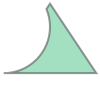

In [12]:
# Compute the difference of polygon1 and polygon2 (polygon1 minus polygon2)
difference = polygon1.difference(polygon2)

# Show the difference geometry
difference

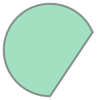

In [13]:
# Compute the difference of polygon2 and polygon1 (polygon2 minus polygon1)
difference = polygon2.difference(polygon1)

# Show the difference geometry
difference

#### Symmetric Difference

The `symmetric_difference` operation finds the areas that are in either of the input geometries but not in their intersection. This results in a geometry that represents the non-overlapping areas of both geometries. Similarly to the union and command difference, we can test the symmetric difference as follows.

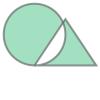

In [14]:
# Compute the symmetric difference of the two polygons
symmetric_difference = polygon1.symmetric_difference(polygon2)

# Show the symmetric difference geometry
symmetric_difference

### 6. Area and Perimeter Computation

Shapely provides robust built-in methods to compute geometric properties such as the area and circumference (or perimeter) of various shapes. These properties are crucial in many spatial analyses, such as 
- land use planning,
- environmental impact assessments, and
- natural resource management.

#### Area Computation
The `area` of a geometry is a measure of the surface it covers. Shapely can compute the area of two-dimensional objects - Polygons and MultiPolygons. The area is computed in the coordinate system of the geometry, which typically represents square units of the spatial reference system used. Later, we will discuss the different coordinate systems in a dedicated notebook.

To test the area computation:

- create two triangles and compute and print their areas,
- join them into a MultiPolygon and repeat these analytical steps,
- create their union, creating a single polygon containing both these triangles.


Area of the polygon1: 0.5 

Area of the polygon1: 3.0 



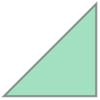

In [15]:
# Import the Polygon and MultiPolygon constructors from Shapely
from shapely.geometry import Polygon, MultiPolygon

# Create individual polygons
polygon1 = Polygon([(0, 0), (1, 1), (1, 0)])
polygon2 = Polygon([(1, 0), (1, 3), (3, 0)])

# Compute the area of the polygons
area_polygon1 = polygon1.area
area_polygon2 = polygon2.area

# Print the area
print(f"Area of the polygon1: {area_polygon1}", "\n")
print(f"Area of the polygon1: {area_polygon2}", "\n")

polygon1

Area of the multipolygon: 3.5 



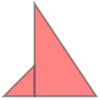

In [16]:
# Combine polygons into a multipolygon
multipolygon = MultiPolygon([polygon1, polygon2])

# Compute the area of the multipolygon
area_multipolygon = multipolygon.area

# Print the area
print(f"Area of the multipolygon: {area_multipolygon}", "\n")

multipolygon

Area of the polygon: 3.5 



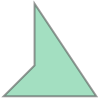

In [17]:
# Combine polygons by taking their union
polygon = polygon1.union(polygon2)

# Compute the area of the multipolygon
area_polygon = polygon.area

# Print the area
print(f"Area of the polygon: {area_polygon}", "\n")

polygon

As the two triangles only touch each other (so they don't overlap), both the multi polygon built off from them and their union have an area that is equal to the area of the triangles separately, measuring 0.5 + 3 = 3.5 square units total.

#### Circumference (Perimeter) Computation
The circumference, or perimeter, of a geometry is the total `length` of its boundary lines. Shapely can compute the perimeter of one- and two-dimensional geometries, such as LineStrings, Polygons, and MultiPolygons.

Now, we follow the previous area computations and first compute the perimeter of the two triangles as separate polygons, then as a MultiPolygon, and finally, as a unified Polygon.

In [18]:
# Compute the perimeter of the polygons
perimeter_polygon1 = polygon1.length
perimeter_polygon2 = polygon2.length

# Print the perimeter  of the polygons
print(f"Perimeter of polygon1: {perimeter_polygon1}", "\n")
print(f"Perimeter of polygon2: {perimeter_polygon2}", "\n")
print(f"Combined perimeter: {perimeter_polygon1 + perimeter_polygon2}")

Perimeter of polygon1: 3.414213562373095 

Perimeter of polygon2: 8.60555127546399 

Combined perimeter: 12.019764837837084


In [19]:
# Compute the perimeter of the multipolygon
perimeter_multipolygon = multipolygon.length

# Print the perimeter  of the multipolygon
print(f"Perimeter of the multipolygon: {perimeter_multipolygon}", "\n")

Perimeter of the multipolygon: 12.019764837837084 



In [20]:
# Compute the perimeter of the joint polygon
perimeter_polygon = polygon.length

# Print the perimeter  of the joint polygon
print(f"Perimeter of the unified polygon: {perimeter_polygon}", "\n")

Perimeter of the unified polygon: 10.019764837837085 



Here, we can see again that the multipolgon's perimeter is the same as the sum of the individual polygons' perimeters. However, when we take the union, the touching edge of the two triangles will be dissolved. Hence, the resulting polygon will have a shorter perimeter than the two individual polygons combined with the union operation.

### 7. Computing Centroids

The centroid of a geometry is the geometric center or the "center of mass" of that shape. For simple geometries like points, lines, and polygons, the centroid can be thought of as the average position of all the points in the geometry. Hence, a point is its own centroid, while a line's centroid is its midpoint.

Compute the centroid of three different geometries and see:
- how a point at (0, 0) turns into itself,
- how we get the center point of a line connecting (0, 0) and (0, 1), and
- how we get the center point for the triangle of (0, 0), (1, 1), and (1, 0).

Centroid of the point: POINT (0 0) 



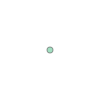

In [21]:
# Import the Point constructor from Shapely
from shapely.geometry import Point

# Create a point
point = Point(0, 0)

# Compute the centroid of the point
centroid = point.centroid

# Print and show the centroid
print(f"Centroid of the point: {centroid}", "\n")
centroid

Centroid of the line: POINT (0 0.5) 



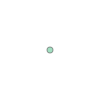

In [22]:
# Import the LineString constructor from Shapely
from shapely.geometry import LineString

# Create a line
line = LineString([(0, 0), (0, 1)])

# Compute the centroid of the line
centroid = line.centroid

# Print and show the centroid
print(f"Centroid of the line: {centroid}", "\n")
centroid

Centroid of the polygon: POINT (0.6666666666666666 0.3333333333333333) 



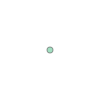

In [23]:
# Import the Polygon constructor from Shapely
from shapely.geometry import Polygon

# Create a polygon from a series of points
polygon = Polygon([(0, 0), (1, 1), (1, 0)])

# Compute the centroid of the polygon
centroid = polygon.centroid

# Print and show the centroid
print(f"Centroid of the polygon: {centroid}", "\n")
centroid

### 8. Enclosing Polygons


Enclosing polygons are geometries that completely contain another geometry and represent simplified or generalized versions of the original shape. Shapely provides two primary methods for creating enclosing polygons from existing geometries: the `envelope` and the `convex_hull` methods.

#### Envelope

The `envelope` of a geometry is the smallest rectangle (aligned with the coordinate axes) that completely contains the geometry. In this example, we create a concave polygon and first draw its enclosing envelope, which, as expected, is a rectangle covering the polygon in each direction.

The polygon: POLYGON ((-1 1, 0 0, 1 1, 1 0, 0.5 0.5, 0 2, -1 1)) 

Area of the polygon: 1.25 



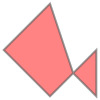

In [24]:
# Import the Polygon constructor from Shapely
from shapely.geometry import Polygon

# Create a polygon from a series of points
polygon = Polygon([(-1, 1), (0, 0), (1, 1), (1, 0), (0.5, 0.5), (0, 2)])
print(f"The polygon: {polygon}", "\n")
print(f"Area of the polygon: {polygon.area}", "\n")

polygon

Envelope of the polygon: POLYGON ((-1 0, 1 0, 1 2, -1 2, -1 0)) 

Area of the envelope: 4.0 



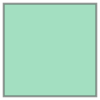

In [25]:
# Compute the envelope (bounding box) of the polygon
envelope = polygon.envelope
print(f"Envelope of the polygon: {envelope}", "\n")
print(f"Area of the envelope: {envelope.area}", "\n")

envelope

#### Convex Hull

The `convex_hull` of a geometry is the smallest convex polygon that can completely contain the geometry. It can be visualized as the shape formed by stretching a rubber band around the outermost points of the geometry. The code below shows how to obtain the convex hull of a polygon, which, in turn, is a convex polygon that follows the outline of the original one.

Convex hull of the polygon: POLYGON ((0 0, -1 1, 0 2, 1 1, 1 0, 0 0)) 

Area of the convex hull: 2.5 



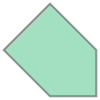

In [26]:
# Compute the convex hull of the polygon
convex_hull = polygon.convex_hull
print(f"Convex hull of the polygon: {convex_hull}", "\n")
print(f"Area of the convex hull: {convex_hull.area}", "\n")

convex_hull

Above, we also printed the area of each geometry to illustrate how the envelope and the convex hull alter the original shape. As expected, the total area of the original polygon is the smallest, followed by the convex hull, while the envelope is the largest one.

### 9. Creating a Bounding Box


A **bounding box** is a rectangular box that completely contains a geometry or a set of geometries. At first, it looks very similar to the concept of an envelope. However, a bounding box is defined by its minimum and maximum x and y coordinates (`minx`, `miny`, `maxx`, `maxy`) instead of a seed geometry object. 

Bounding boxes are useful for:
- spatial indexing,
- quick overlap checks, and
- defining the extent of a spatial dataset.

In geospatial data science, bounding boxes are often used to quickly determine if objects are likely to intersect or to limit the scope of spatial queries.

Shapely provides a convenient way to create bounding boxes using the `box` constructor. In this example, we create a rectangular bounding box with a lower left corner at the (0, 0) point and an upper right point at the (1, 2) point.

Type of bbox: <class 'shapely.geometry.polygon.Polygon'> 

POLYGON ((1 0, 1 2, 0 2, 0 0, 1 0)) 



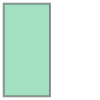

In [27]:
# Import the box constructor from Shapely
from shapely.geometry import box

# Create a bounding box with specified min and max coordinates
bbox = box(minx=0, miny=0, maxx=1, maxy=2)

# Print the type of the bounding box to confirm its creation
print(f"Type of bbox: {type(bbox)}", "\n")

# Print and show the bounding box
print(bbox, "\n")
bbox

### 10. Within-test


The **within-test** is a spatial operation that determines if a geometry is completely inside another geometry. This operation is essential for spatial analysis tasks such as: 
- containment checks,
- identifying if a point lies within a specific region, or
- determining spatial relationships between different geometries. 

Shapely provides the `within` method to perform this test easily, which we now use to test whether a point at the origin is within a circle that was drawn around the origin with a radius of one and to test if it is within a circle drawn around the (3, 3) point with a unit radius.


Point is within polygon_1: True 

Point is within polygon_2: False 



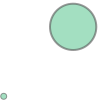

In [28]:
# Import the Point constructor from Shapely
from shapely.geometry import Point

# Create a point at coordinates (0, 0)
point = Point(0, 0)

# Create two polygons by buffering points (creating circles) 
# with a radius of 1 unit
polygon_1 = Point(0, 0).buffer(1)
polygon_2 = Point(3, 3).buffer(1)

# Check if the point is within polygon_1 and print the result
is_within_polygon_1 = point.within(polygon_1)
print(f"Point is within polygon_1: {is_within_polygon_1}", "\n")

# Check if the point is within polygon_2 and print the result
is_within_polygon_2 = point.within(polygon_2)
print(f"Point is within polygon_2: {is_within_polygon_2}", "\n")

# Show the original point and the second polygon together
point.union(polygon_2)

As the first polygon was a circle centered around the original point, it contains that point. However, as the second polygon is a circle with a radius of one and an origin at (3, 3), it does not contain the original point. We illustrate this by showing the joint geometry of the original point and the second circle, which shows how far they are from each other.

### 11. Distance Calculation

**Distance calculation** is a fundamental operation in geospatial analysis, allowing us to measure the separation between two geometric objects. This operation can be used to:
- determine the proximity of features,
- analyze spatial relationships, and
- perform various spatial queries. 

Shapely provides the `distance` method to compute the distances between different types of geometries, such as points, lines, and polygons. In  order:

- compute the distance between two points,
- then the distance between a point and a polygon, and
- then the distance between two polygons drawn around the initial points.

Visualize these geometries by first combining them using the union command and then simply outputting them with their respective code sales.

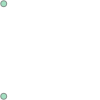

In [29]:
# Import the Point constructor from Shapely
from shapely.geometry import Point

# Create two points at coordinates (0, 0) and (0, 1)
point_1 = Point(0, 0)
point_2 = Point(0, 1)

# Showing the two points on the cell's output
point_1.union(point_2)

In [30]:
# Calculate and print the distance between the two points
distance_points = point_1.distance(point_2)
print(f"Distance between {point_1} and {point_2}: {distance_points}", "\n")

Distance between POINT (0 0) and POINT (0 1): 1.0 



Distance from the edge of circle_1 to point_2:     0.5 



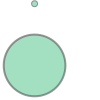

In [31]:
# Create buffers (circles) around the two points with a radius of 0.5 units
circle_1 = point_1.buffer(0.5)
circle_2 = point_2.buffer(0.25)

# Calculate and print the distance from the edge of circle_1 to point_2
distance_circle_to_point = circle_1.distance(point_2)
print(f"Distance from the edge of circle_1 to point_2: \
    {distance_circle_to_point}", "\n")

# Showing  circle_1 and point_1
circle_1.union(point_2)

Distance between the edges of circle_1 and circle_2:     0.25 



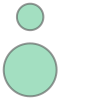

In [32]:
# Calculate and print the distance between circle_1 and circle_2
distance_circles = circle_1.distance(circle_2)
print(f"Distance between the edges of circle_1 and circle_2: \
    {distance_circles}", "\n")

# Showing the two circles on the cell's output
circle_1.union(circle_2)

&nbsp; 
&nbsp; 

### 12. Simplifying Geometries

**Simplifying** a geometry involves reducing the complexity of its shape while retaining its essential form. This process is useful for improving performance during rendering and analysis, especially when working with large or complex shapes. Simplification can help reduce the number of vertices in a geometry, making it easier to process and visualize. 

Shapely provides the `simplify` method, which allows us to simplify geometries based on a specified tolerance level. The tolerance defines the maximum distance a point on the simplified geometry can deviate from the original geometry.

In this example:
- create a polygon with a relatively complicated edge line, and
- then use two different tolerance parameters of the simplify function to see how the simplification goes.

While at the tolerance level of 1, we still have a concave object; tolerance level 5 will close the polygon and simplify it down to four edges.


Original Polygon: POLYGON ((0 0, 2 1, 4 0, 4 3, 3 4, 1 4, 0 3, 1 1, 3 1, 2 2, 1 2, 0 0)) 



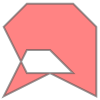

In [32]:
# Import the Polygon constructor from Shapely
from shapely.geometry import Polygon

# Define the coordinates for the polygon
coords = [(0, 0), (2, 1), (4, 0), (4, 3), (3, 4), (1, 4), 
          (0, 3), (1, 1), (3, 1), (2, 2), (1, 2), (0, 0)]

# Create a polygon from the coordinates
polygon = Polygon(coords)

# Print and show the original polygon
print(f"Original Polygon: {polygon}", "\n")
polygon

Simplified Polygon with tolerance 1: POLYGON ((0 0, 4 0, 4 3, 1 4, 0 3, 1 1, 3 1, 1 2, 0 0)) 



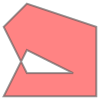

In [33]:
# Simplify the polygon with a tolerance of 1 unit
simplified_polygon_1 = polygon.simplify(1)

# Print and show the simplified polygon
print(f"Simplified Polygon with tolerance 1: {simplified_polygon_1}", "\n")
simplified_polygon_1

Simplified Polygon with tolerance 5: POLYGON ((1 4, 4 0, 4 3, 1 4)) 



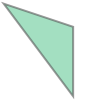

In [34]:
# Simplify the polygon with a tolerance of 5 units
simplified_polygon_5 = polygon.simplify(5)

# Print and show the simplified polygon
print(f"Simplified Polygon with tolerance 5: {simplified_polygon_5}", "\n")
simplified_polygon_5

### Summary on Geometries

In this notebook, we overviewed the core components that make geospatial data and analytics geospatial - geometries. To that end,
- we explored the Python package Shapely and learned how to use it to create basic geometries, such as points, lines and polygons in 2D, though there are also 3D functions;
- we learned how to transform and manipulate single and multiple geometries as well as how to calculate the centroid point and various enclosing polygons of a geometry;
- finally, we learned about geometric functions as, such as computing distance between geometries. 

## Exercises

1. Create a diamond-shaped polygon.
2. Create 3 overlapping circles.
3. Calculate the distances between the 3 circles and draw a triangle connecting their centres.